## **Machine Learning Final Project DUE: Friday May 7th 11:59pm**

**Note: Please read all the instructions carefully before starting the project.**

For your final project you will build an ML model to analyze a dataset of your choice. You are welcome to keep working on the data in your EDA project if your data is large enough (at least 1000 rows for simple models and at least 10,000 for more complex models) or you can choose from the datasets/project suggestions below.

In this project make sure that you:
- Have a large enough dataset
- Split your data in training and testing
- Explore your data to inform which type of model to choose (no need if you are using your EDA dataset)
- Try different models on your training dataset - then select the most promising model
- Use cross validation to fine tune the model’s parameters such as alpha in lasso
- Simplify your model using regularization, prunnning, drop-out, etc. to avoid overfitting
- Communicate your model’s performance and make sure you compare it to a benchmark when appropriate
- Plot interesting graphs and results
- Write and publish your article to medium
- Commit your code to your GitHub

Please ensure you handle all the preprocessing before the modeling.

Suggestions for project:
You can take a look at the resources given below for choosing a dataset for your project. 

- Traffic sign detection - https://benchmark.ini.rub.de/gtsdb_dataset.html
- Cat and dog classifier - https://www.kaggle.com/c/dogs-vs-cats/data
- Other datasets from Kaggle - https://www.kaggle.com/data/41592

## **Grading Criteria**

- Show clear exploration of the data to justify model choice
- Train mutliple models and clearly articulate why you chose your final model
- Show your performance on test dataset
- Clear and concise write-up with clear well-documented figures
- Commit your code to GitHub

## **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Friday (05/07/2021)
- To submit your assignment, download your notebook and the dataset, zip the dataset and notebook, and submit the zipped file on blackboard.
- Make sure the notebook is named in the format - Final_LastName_FirstName. If you are submitting a zipped file, please name the file as well in the same format.
- Please include the link to access your blog and your github repo in your notebook.
- Also include the link to your notebook, github repo and the blog in the submission on blackboard. Please ensure the TAs have the required access to your notebooks and the github repo.

**Note - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.**

In [1]:
# Basic Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
from scipy.stats import pearsonr

# Model Building and Assessment
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (recall_score, precision_score,
                             accuracy_score, plot_confusion_matrix)
from sklearn.ensemble import (BaggingClassifier, RandomForestClassifier,
                              AdaBoostClassifier, GradientBoostingClassifier,
                              VotingClassifier)
import xgboost as xgb

In [2]:
# Setting up personal configurations
pd.set_option('display.max_columns', None)

In [3]:
# open csv and read, print shape and head
df = pd.read_csv('/content/data.csv')
print(df.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0           1.1          93.

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


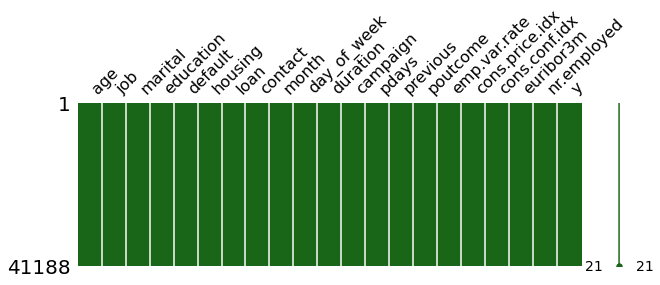

In [4]:
# check for missing values
print(df.isnull().sum())
ms.matrix(df,figsize=(10,3),color =(0.1, 0.4, 0.1))
plt.show()

In [5]:
# check initial datatypes
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

In [6]:
# change object data types to categorical variables 
cat_features = {'job','marital','education','default',
                'housing','loan','contact','poutcome'}
for feature in cat_features:
    df[feature] = df[feature].astype('category')
    
df.dtypes

age                  int64
job               category
marital           category
education         category
default           category
housing           category
loan              category
contact           category
month               object
day_of_week         object
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome          category
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
y                    int64
dtype: object

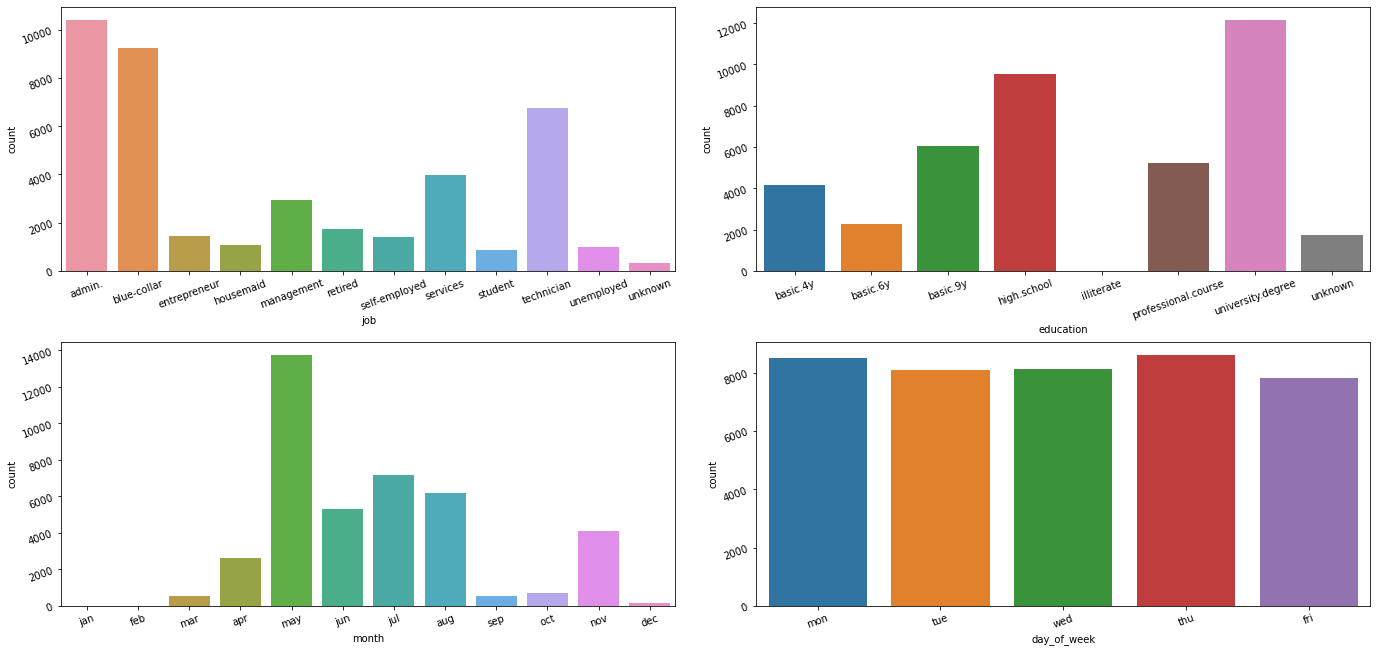

In [7]:
# categorical variable analysis
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
fig.tight_layout(pad=5)

sns.countplot(x=df['job'], data=df, ax=ax[0,0])
ax[0,0].tick_params(labelrotation=20)

sns.countplot(x=df['education'], data=df, ax=ax[0,1])
ax[0,1].tick_params(labelrotation=20)

months = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
sns.countplot(x=df['month'], data=df, ax=ax[1,0], order=months)
ax[1,0].tick_params(labelrotation=20)

days = ['mon','tue','wed','thu','fri']
sns.countplot(x=df['day_of_week'], data=df, ax=ax[1,1], order=days)
ax[1,1].tick_params(labelrotation=20)

plt.show();

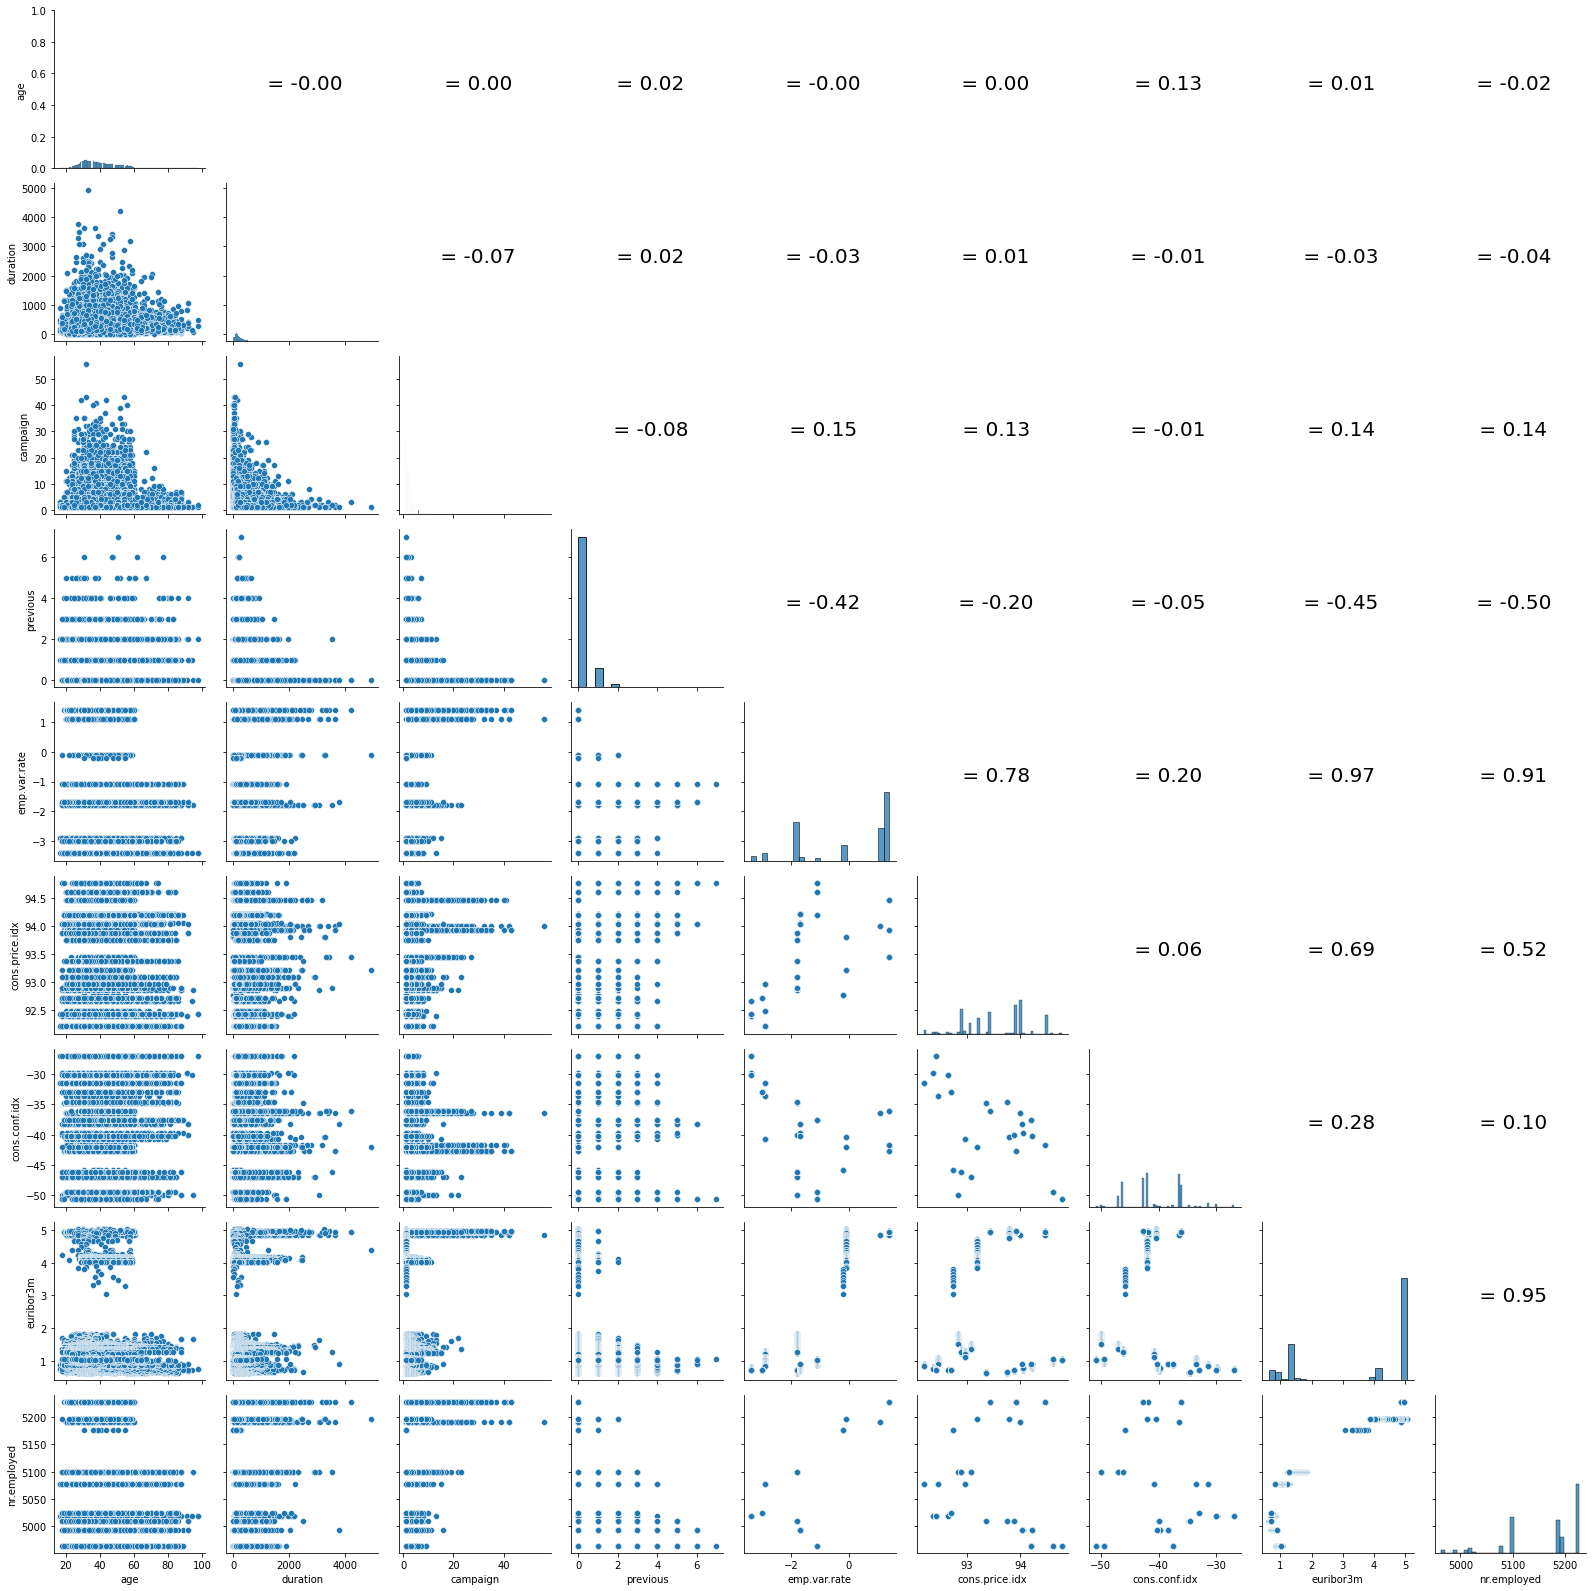

In [8]:
def corrfunc(x, y, label=None, color=None, **kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    ax.annotate(' = {:.2f}'.format(r), fontsize=20,
                xy=(0.5,0.5), xycoords='axes fraction', ha='center')
    ax.set_axis_off()

analysis_cols = df.drop(columns=['y','pdays'], inplace=False)
g = sns.PairGrid(analysis_cols)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(corrfunc)
plt.show();

# many correlated, most being macroeconomic indicators:

# VERY STRONG
# emp.var.rate / euribor3m (employment variation rate / interest rates)
# nr.employed / euribor3m (number of employees / interest rates)
# emp.var.rate / nr.employed (employment variation rate / number of employees)

# STRONG
# cons.price.idx / emp.var.rate (consumer prices / employment variation)
# cons.price.idx / euribor3m (consumer prices / interest rates)

# MODERATE
# num employed / cons prices
# prevous campaigns / employee variation
# prevous campaigns / euribor3m
# prevous campaigns / number employed

In [9]:
# drop correlated features, print final data set
df.drop(columns=['nr.employed','emp.var.rate'], inplace=True)
print(df.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   cons.price.idx  cons.conf.idx  euribor3m  y  
0          93.994          -36.4      4.857  0  
1     

# **Model Building and Comparison**

In [10]:
# split into X and Y, goal is to predict outcome (Y) based on other variables (X)
y = df['y']
features = df.drop('y',axis=1,inplace=False) # store features separately for convenience
X = pd.get_dummies(features) # convert and store as X for use in partitioning

# split into 70/30 training/test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020, stratify=y)

#######
# Note for later: using recall / precision because accuracy is an imbalanced metric
# We want high recall, high precision — but precision is more important
# See: https://en.wikipedia.org/wiki/Precision_and_recall

### *Baseline using Dummy Classifier*

In [11]:
# BASELINE: DUMMYCLASSIFIER
dc = DummyClassifier(strategy='most_frequent')
dc.fit(X_train,y_train)
pred_baseline = dc.predict(X_test)
baseline_acc = dc.score(X_test,y_test)
print('Baseline Training Accuracy =', baseline_acc)

Baseline Training Accuracy = 0.8873512988589464


### *Decision Tree*

In [12]:
# build and fit decision tree classifier
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=5)
dtc.fit(X_train, y_train)

# predict data using test partition
pred_dtc = dtc.predict(X_test)

# plot confusion matrix, print accuracy of model
print('Recall: \t {}'.format(round(recall_score(y_test, pred_dtc),4)))
print('Precision: \t {}'.format(round(precision_score(y_test, pred_dtc),4)))
print('Accuracy: \t {}'.format(round(accuracy_score(y_test, pred_dtc),4)))

#metrics.plot_confusion_matrix(dtc, X_test, y_test)
#plt.show()

Recall: 	 0.4353
Precision: 	 0.6372
Accuracy: 	 0.9085


### *Bagging Model*

In [13]:
model_bagging = BaggingClassifier(random_state=2020)
model_bagging.fit(X_train, y_train)
pred_bagging = model_bagging.predict(X_test)

print('Recall: \t {}'.format(round(recall_score(y_test, pred_bagging),4)))
print('Precision: \t {}'.format(round(precision_score(y_test, pred_bagging),4)))
print('Accuracy: \t {}'.format(round(accuracy_score(y_test, pred_bagging),4)))

Recall: 	 0.4734
Precision: 	 0.613
Accuracy: 	 0.907


### *Random Forests*

In [14]:
model_rf = RandomForestClassifier(n_estimators=100, max_features=5, random_state=2020)
model_rf.fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)

print('Recall: \t {}'.format(round(recall_score(y_test, pred_rf),4)))
print('Precision: \t {}'.format(round(precision_score(y_test, pred_rf),4)))
print('Accuracy: \t {}'.format(round(accuracy_score(y_test, pred_rf),4)))

Recall: 	 0.4131
Precision: 	 0.6647
Accuracy: 	 0.9104


### *AdaBoost*

In [15]:
base_est = DecisionTreeClassifier(max_depth=4)
boost = AdaBoostClassifier(base_est, n_estimators=200, random_state=42, learning_rate=0.05)
boost.fit(X_train, y_train)
pred_boost = boost.predict(X_test)

print('Recall: \t {}'.format(round(recall_score(y_test, pred_boost),4)))
print('Precision: \t {}'.format(round(precision_score(y_test, pred_boost),4)))
print('Accuracy: \t {}'.format(round(accuracy_score(y_test, pred_boost),4)))

Recall: 	 0.5216
Precision: 	 0.6546
Accuracy: 	 0.9151


### *Gradient Boosted Trees Classifier*

In [16]:
gbtc = GradientBoostingClassifier(random_state=42)
gbtc.fit(X_train, y_train)
pred_gbc = gbtc.predict(X_test)

print('Recall: \t {}'.format(round(recall_score(y_test, pred_gbc),4)))
print('Precision: \t {}'.format(round(precision_score(y_test, pred_gbc),4)))
print('Accuracy: \t {}'.format(round(accuracy_score(y_test, pred_gbc),4)))

Recall: 	 0.5237
Precision: 	 0.6526
Accuracy: 	 0.9149


### *XGBoost Classifier*

In [17]:
xgbc = xgb.XGBClassifier(max_depth=4, learning_rate=0.125, n_estimators=65)
xgbc.fit(X_train,y_train)
pred_xgb = xgbc.predict(X_test)

print('Recall: \t {}'.format(round(recall_score(y_test, pred_xgb),4)))
print('Precision: \t {}'.format(round(precision_score(y_test, pred_xgb),4)))
print('Accuracy: \t {}'.format(round(accuracy_score(y_test, pred_xgb),4)))

Recall: 	 0.5144
Precision: 	 0.6673
Accuracy: 	 0.9164


### *Voting Classifier with Top 3 Models*

In [18]:
# xgbc, boost, gbtc are best

voter = VotingClassifier(estimators = [('XGBoost', xgbc), 
                                       ('AdaBoost', boost), 
                                       ('GBT', gbtc)], 
                        voting='soft')
voter.fit(X_train, y_train)
pred_voter = voter.predict(X_test)

print('Recall: \t {}'.format(round(recall_score(y_test, pred_voter),4)))
print('Precision: \t {}'.format(round(precision_score(y_test, pred_voter),4)))
print('Accuracy: \t {}'.format(round(accuracy_score(y_test, pred_voter),4)))

Recall: 	 0.5244
Precision: 	 0.6618
Accuracy: 	 0.9162


# **Regularization of XGBoost Model**

In [19]:
# Regularized by looking at depth, learning rate, and number of estimators across various ranges
# Narrowed down and ran test at each combination of parameters to find optimized combination

xgbc_reg = xgb.XGBClassifier(max_depth=5, learning_rate=0.176, n_estimators=50)
xgbc_reg.fit(X_train,y_train)
pred_xgbc_reg = xgbc_reg.predict(X_test)

print('Recall: \t {}'.format(round(recall_score(y_test, pred_xgbc_reg),4)))
print('Precision: \t {}'.format(round(precision_score(y_test, pred_xgbc_reg),4)))
print('Accuracy: \t {}'.format(round(accuracy_score(y_test, pred_xgbc_reg),4)))

Recall: 	 0.5395
Precision: 	 0.667
Accuracy: 	 0.9178


## **Final Model Analysis**

In [20]:
# look at feature importance
print('Feature Importance:')
imp = pd.DataFrame(zip(X_test.columns, xgbc_reg.feature_importances_), 
                   columns=['Feature','Importance'])
imp = imp.sort_values(by='Importance',ascending=False)
print(imp.head(5))

Feature Importance:
             Feature  Importance
1           duration    0.125831
7          euribor3m    0.110980
49         month_may    0.073442
60  poutcome_success    0.051980
6      cons.conf.idx    0.043478


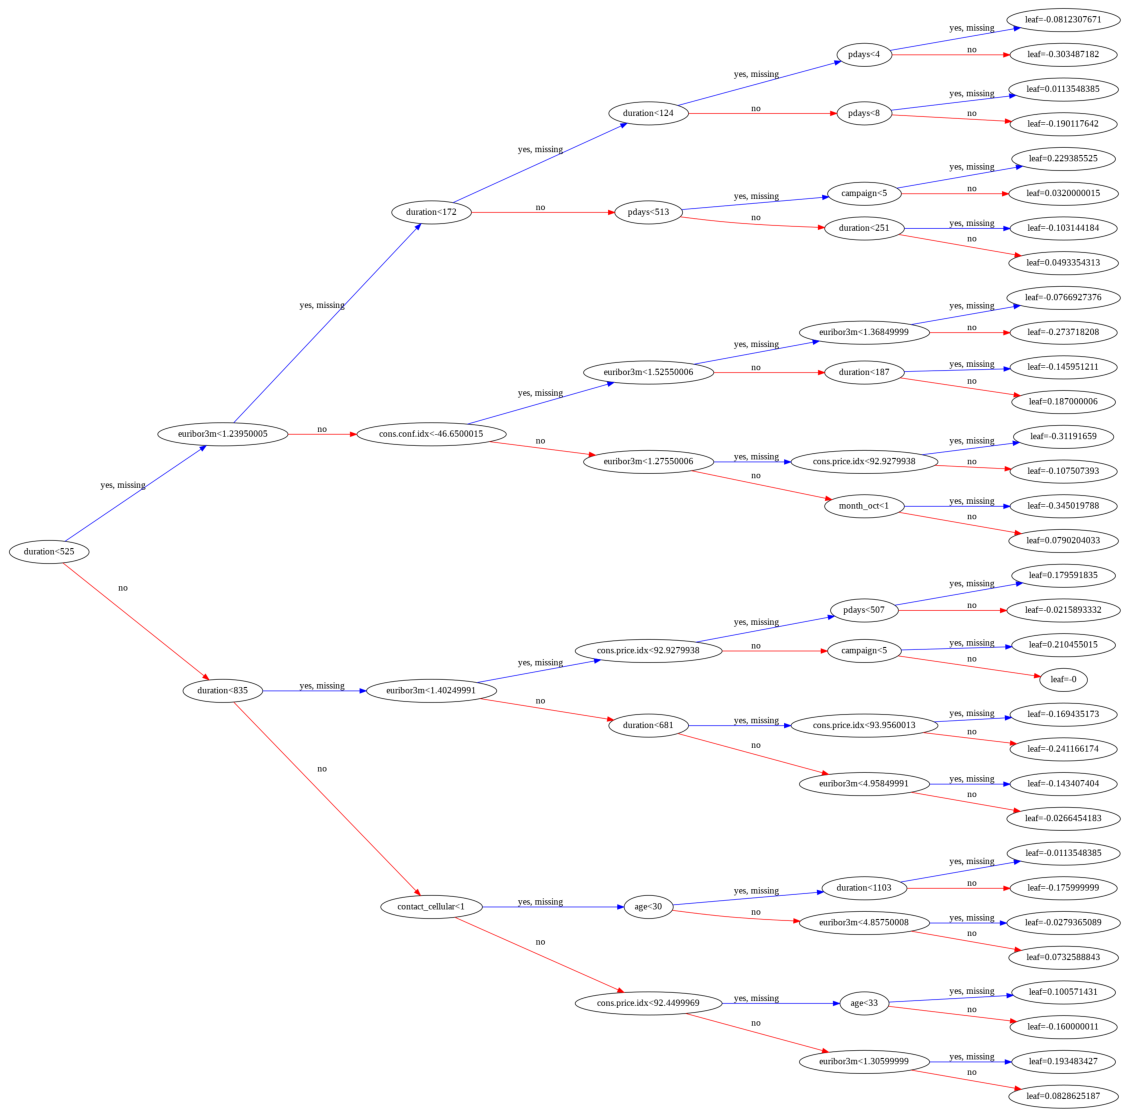

In [21]:
# make sample tree
fig, ax = plt.subplots(figsize=(20, 40))
xgb.plot_tree(xgbc_reg, ax=ax, rankdir='LR')
plt.show();

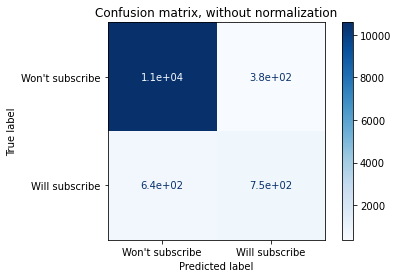

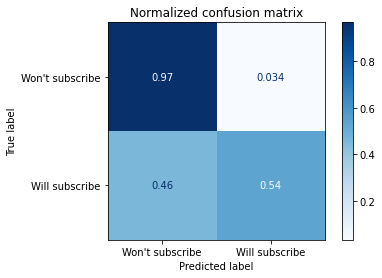

In [22]:
matrices = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
outcomes = ['Won\'t subscribe','Will subscribe']

for title, normalize in matrices:
    cm = plot_confusion_matrix(xgbc_reg, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 display_labels=outcomes,
                                 normalize=normalize)
    cm.ax_.set_title(title)

plt.show();

# this makes sense, as we are striving to build a model that minimizes those we aim our marketing efforts at yet they don't subscribe